In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('financial_loan.csv')

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [8]:
df.shape

(38576, 24)

In [9]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [12]:
df['emp_title'].nunique()

28525

In [13]:
df.drop('emp_title',axis = 1,inplace = True)

`emp_title` has many unique values and missing entries, and the dataset already contains stronger features like `emp_length` and `annual_income`, so it’s unlikely to add meaningful predictive value.It's best to remove it 

In [14]:
df.rename(columns={
    "id": "loan_id",
    "address_state": "state",
    "application_type": "application_type",
    "emp_length": "employment_length",
    "grade": "credit_grade",
    "home_ownership": "home_ownership",
    "issue_date": "issue_date",
    "last_credit_pull_date": "last_credit_pull",
    "last_payment_date": "last_payment",
    "loan_status": "loan_status",
    "next_payment_date": "next_payment",
    "member_id": "member_id",
    "purpose": "loan_purpose",
    "sub_grade": "credit_subgrade",
    "term": "loan_term",
    "verification_status": "verification_status",
    "annual_income": "annual_income",
    "dti": "debt_to_income",
    "installment": "monthly_installment",
    "int_rate": "interest_rate",
    "loan_amount": "loan_amount",
    "total_acc": "total_accounts",
    "total_payment": "total_payment"
}, inplace=True)


### EDA(Exploratory Data Analysis)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              38576 non-null  int64  
 1   state                38576 non-null  object 
 2   application_type     38576 non-null  object 
 3   employment_length    38576 non-null  object 
 4   credit_grade         38576 non-null  object 
 5   home_ownership       38576 non-null  object 
 6   issue_date           38576 non-null  object 
 7   last_credit_pull     38576 non-null  object 
 8   last_payment         38576 non-null  object 
 9   loan_status          38576 non-null  object 
 10  next_payment         38576 non-null  object 
 11  member_id            38576 non-null  int64  
 12  loan_purpose         38576 non-null  object 
 13  credit_subgrade      38576 non-null  object 
 14  loan_term            38576 non-null  object 
 15  verification_status  38576 non-null 

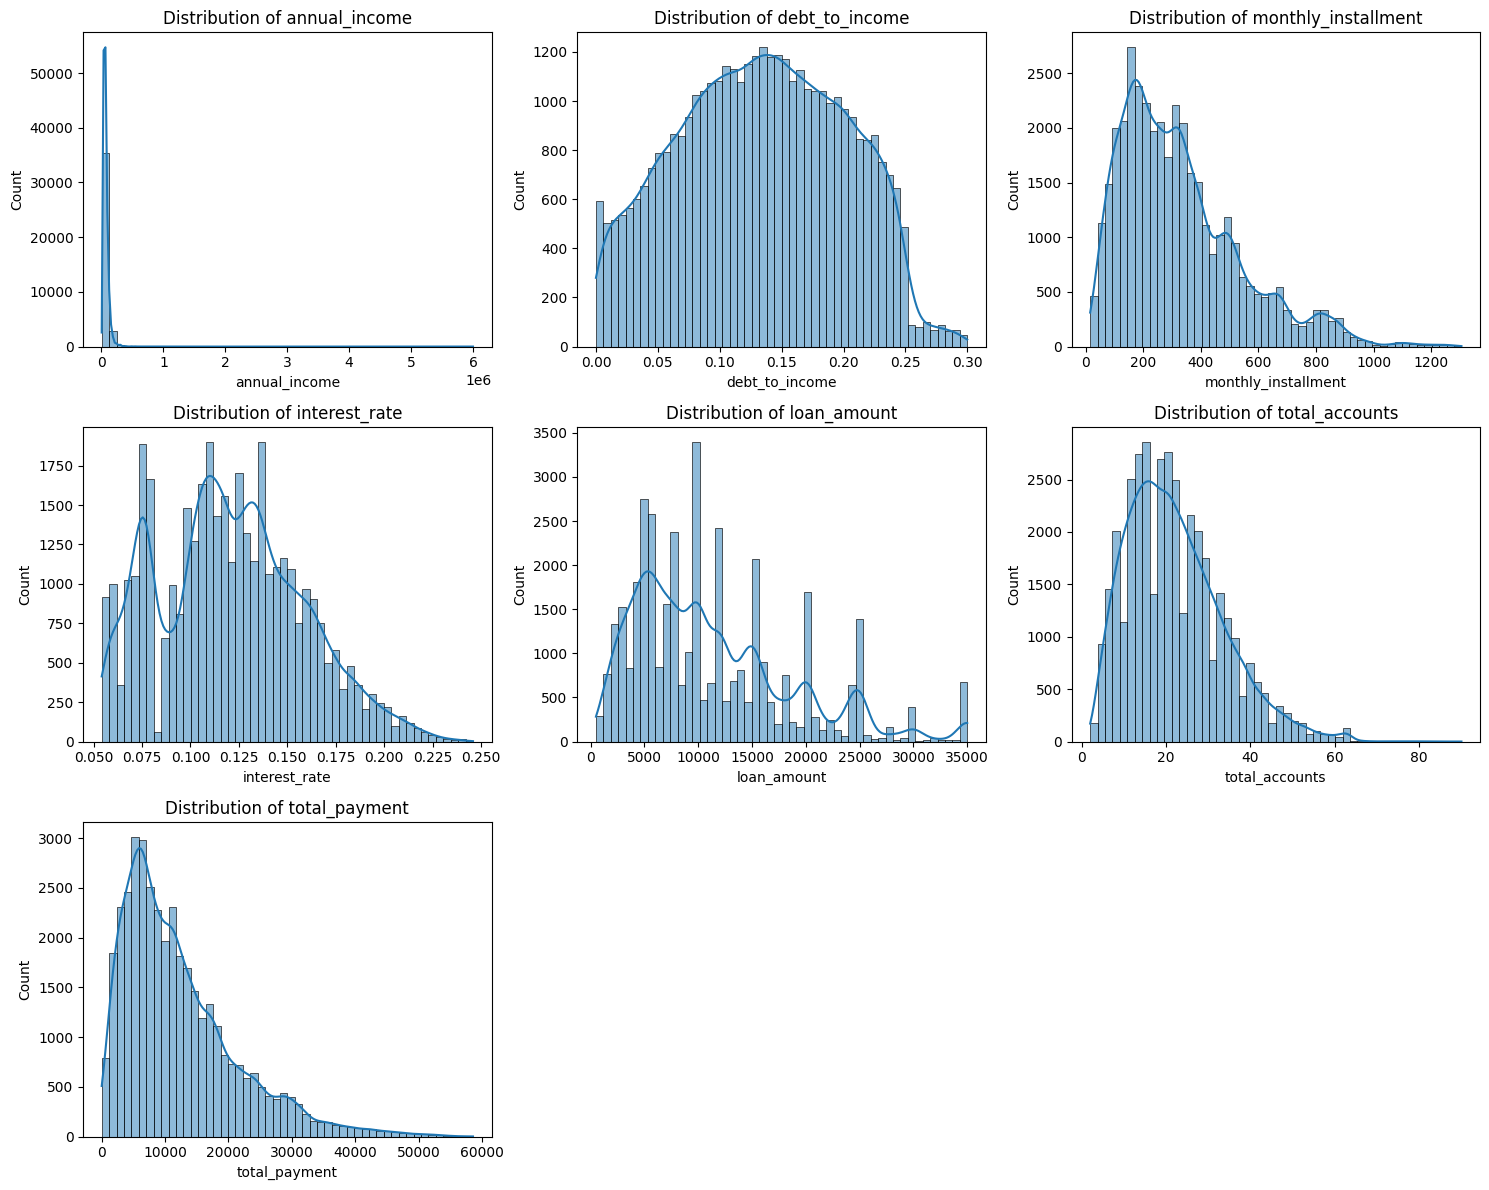

In [16]:
numerical_cols = ['annual_income', 'debt_to_income', 'monthly_installment', 'interest_rate', 'loan_amount', 'total_accounts', 'total_payment']

# 3 rows, 3 columns (enough for 7 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # flatten for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

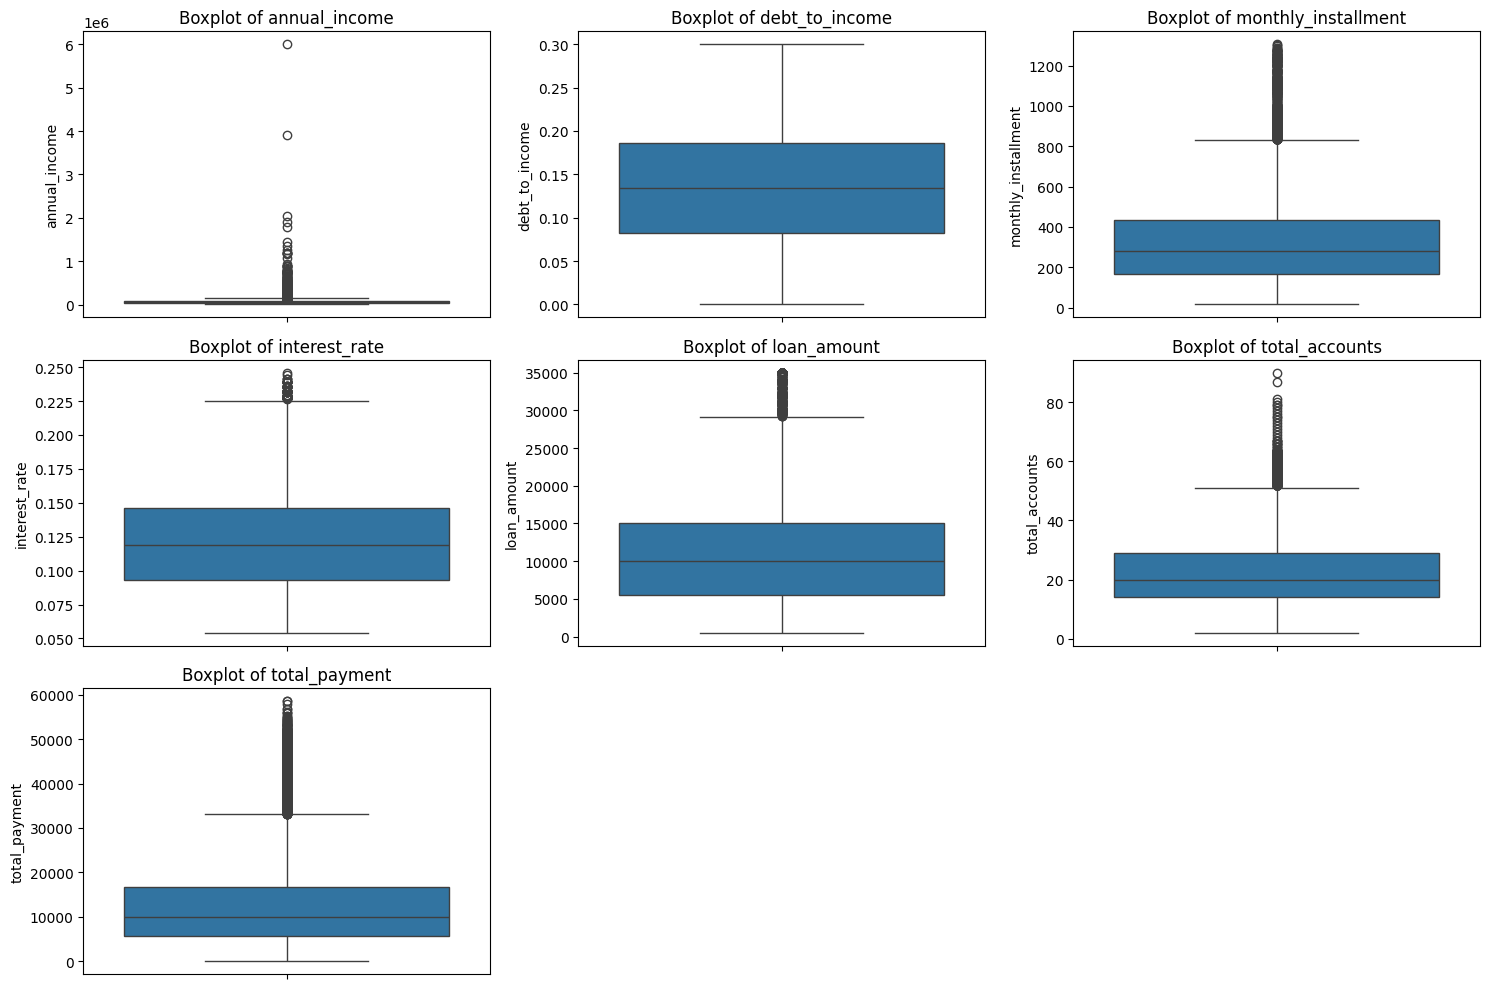

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)   # 3 rows, 3 cols grid
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Summary of Numerical Features Distribution

- **Annual Income**: Highly skewed with extreme outliers, log transformation or capping needed.  
- **Debt-to-Income (DTI)**: Mostly concentrated at lower values, a few borrowers with very high ratios.  
- **Monthly Installment**: Right-skewed with several high-value outliers.  
- **Interest Rate**: Fairly normal distribution between 5%–25%.  
- **Loan Amount**: Concentrated at lower values with significant high-value outliers.  
- **Total Accounts**: Majority under 40, but extreme outliers exist (>80).  
- **Total Payment**: Strongly skewed, a few very large payments, log transformation recommended.  


In [18]:
# Convert to datetime (your format seems to be day-month-year)
date_cols = ['issue_date', 'last_credit_pull', 'last_payment', 'next_payment']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], format="%d-%m-%Y", errors='coerce')



In [19]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

In [20]:
# Display unique counts
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")

state: 50 unique values
state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
Name: count, dtype: int64 

application_type: 1 unique values
application_type
INDIVIDUAL    38576
Name: count, dtype: int64 

employment_length: 11 unique values
employment_length
10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
Name: count, dtype: int64 

credit_grade: 7 unique values
credit_grade
B    11674
A     9689
C     7904
D     5182
E     2786
Name: count, dtype: int64 

home_ownership: 5 unique values
home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64 

loan_status: 3 unique values
loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64 

loan_purpose: 14 unique values
loan_purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
Name: cou

C:\Users\Saif\AppData\Local\Temp\ipykernel_18396\3098713998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set2")
C:\Users\Saif\AppData\Local\Temp\ipykernel_18396\3098713998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set2")
C:\Users\Saif\AppData\Local\Temp\ipykernel_18396\3098713998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set2")
C

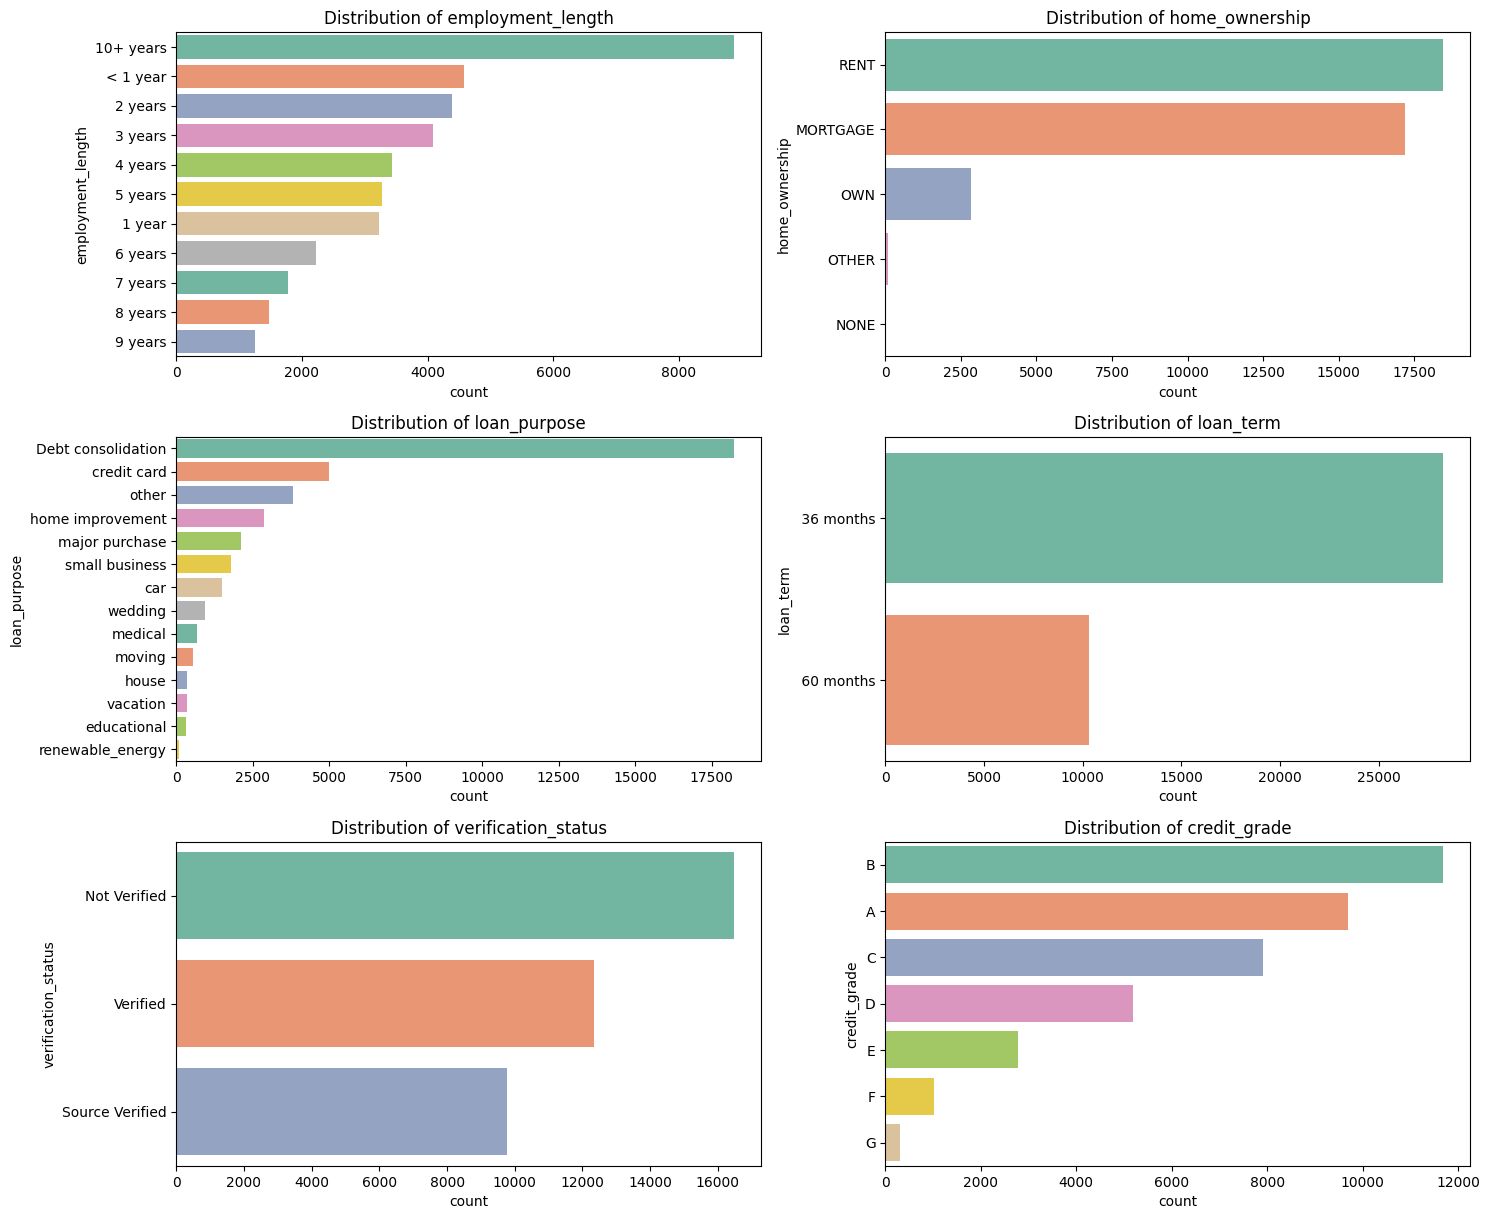

In [21]:
# Plot countplots for each categorical feature
cat_cols = ['employment_length','home_ownership','loan_purpose','loan_term','verification_status','credit_grade']
plt.figure(figsize=(15, len(cat_cols) * 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 2, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
plt.show()

In [22]:
state_df = df['state'].value_counts(normalize = True).head(6).reset_index(name = 'percent')
state_df

,state,percent
0,CA,0.178712
1,NY,0.095940
2,FL,0.071884
3,TX,0.069058
4,NJ,0.047231
5,IL,0.038521


<Axes: xlabel='state', ylabel='percent'>

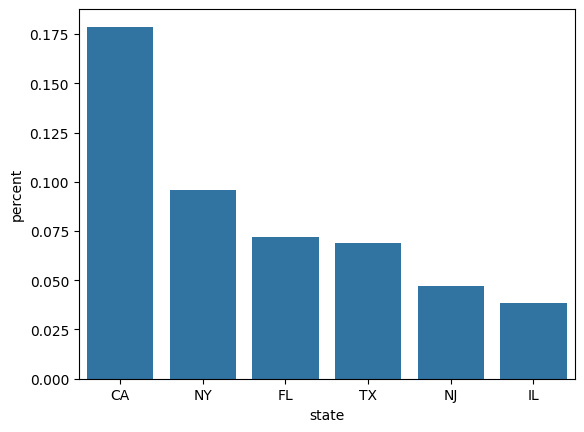

In [23]:
sns.barplot(data = state_df, x = 'state', y = 'percent')

In [24]:
state_df['percent'].sum()

np.float64(0.5013479883865616)

In [25]:
df['loan_status'].value_counts(normalize = True)

loan_status
Fully Paid     0.833290
Charged Off    0.138247
Current        0.028463
Name: proportion, dtype: float64

### Key Insights from Categorical Variables

- **Loan Status** → Target variable, imbalanced (83% Fully Paid).  
- **Employment Length** → Longest (10+ yrs) most common, <1 yr also notable.  
- **Home Ownership** → Mostly Rent & Mortgage; OWN/Other negligible.  
- **Loan Purpose** → Debt consolidation dominates (~47%).  
- **Loan Term** → 36 months more common than 60 months.  
- **Verification Status** → Many Not Verified (~43%).  
- **Credit Grade/Subgrade** → Strong predictor, mostly A & B.  
- **State** → 50 states, top 6 cover majority loans. High cardinality & less predictive can be dropped 
- **Application Type** → Only INDIVIDUAL, drop.  


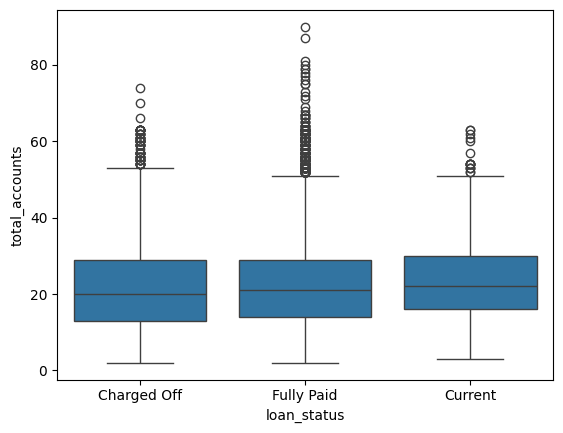

In [26]:
sns.boxplot(x='loan_status', y='total_accounts', data=df)
plt.show()

`total_accounts` looked similar for all `loan_status` meaning doesn't show a relation, therefore it can dropped.

In [27]:
grouped_means = df.groupby('loan_status')[['annual_income', 'debt_to_income',
                           'interest_rate', 'loan_amount',
                           'total_accounts', 'total_payment']].mean()
grouped_means

,annual_income,debt_to_income,interest_rate,loan_amount,total_accounts,total_payment
loan_status,,,,,,
Charged Off,63515.728245,0.140047,0.138786,12288.060191,21.572661,6991.330021
Current,76487.821366,0.147243,0.150993,17182.604736,23.429872,22039.994536
Fully Paid,70427.586885,0.131674,0.116411,10930.419972,22.181117,12804.052139


### Summary of Mean Values by Loan Status

- **Annual Income**: Charged Off borrowers have the lowest (63k) vs Fully Paid (70k) and Current (76k).  
- **Debt-to-Income (DTI)**: Slightly higher for Charged Off (0.14) compared to Fully Paid (0.13).  
- **Interest Rate**: Higher for Charged Off (13.9%) and Current (15.1%) vs Fully Paid (11.6%).  
- **Loan Amount**: Current borrowers take larger loans (17k) than Charged Off (12k) and Fully Paid (11k).  
- **Total Accounts**: Similar across groups (21–23).  
- **Total Payment**: Lowest for Charged Off (7k), highest for Current (22k), Fully Paid (12.8k).  


**Key Insights**  
- Higher **interest rates** and **DTI** are linked with greater charge-off risk.  
- **Charged Off** borrowers generally have **lower income** and **lower repayment amounts**.  
- **Current loans** show higher loan amounts and payments, reflecting ongoing repayments.  


In [28]:
df.head()

,loan_id,state,application_type,employment_length,credit_grade,home_ownership,issue_date,last_credit_pull,last_payment,loan_status,next_payment,member_id,loan_purpose,credit_subgrade,loan_term,verification_status,annual_income,debt_to_income,monthly_installment,interest_rate,loan_amount,total_accounts,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [48]:
df_new = df[['employment_length','home_ownership','loan_status','loan_purpose','loan_term','verification_status','debt_to_income',
             'monthly_installment','interest_rate','annual_income','loan_amount','total_payment']]

df_new = df_new[df_new['loan_status'] != 'Current']

df_new['loan_status_bin'] = df_new['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

In [49]:
df_new.head()

,employment_length,home_ownership,loan_status,loan_purpose,loan_term,verification_status,debt_to_income,monthly_installment,interest_rate,annual_income,loan_amount,total_payment,loan_status_bin
0,< 1 year,RENT,Charged Off,car,60 months,Source Verified,0.0100,59.83,0.1527,30000.0,2500,1009,1
1,9 years,RENT,Fully Paid,car,36 months,Source Verified,0.0535,109.43,0.1864,48000.0,3000,3939,0
2,4 years,RENT,Charged Off,car,36 months,Not Verified,0.2088,421.65,0.1596,50000.0,12000,3522,1
3,< 1 year,MORTGAGE,Fully Paid,car,60 months,Source Verified,0.0540,97.06,0.1065,42000.0,4500,4911,0
4,10+ years,MORTGAGE,Fully Paid,car,36 months,Verified,0.0231,106.53,0.0603,83000.0,3500,3835,0


In [50]:
# Calculate total loans
total_loans = df_new.shape[0]

# Define threshold (5%)
threshold = 0.05

# Compute category proportions
loan_counts = df_new['loan_purpose'].value_counts(normalize=True)

# Identify rare categories
rare_categories = loan_counts[loan_counts < threshold].index

# Replace rare categories with "Other"
df_new['loan_purpose_grouped'] = df_new['loan_purpose'].replace(rare_categories, 'other')

# Create contingency table
contingency_table = pd.crosstab(df_new['loan_purpose_grouped'], df_new['loan_status_bin'])
contingency_table['default %'] = (contingency_table[1]/(contingency_table[0] + contingency_table[1]))*100
contingency_table

loan_status_bin,0,1,default %
loan_purpose_grouped,,,
Debt consolidation,14996,2651,15.022383
credit card,4389,508,10.373698
home improvement,2455,327,11.754134
major purchase,1869,206,9.927711
other,8436,1641,16.284609


In [51]:
from scipy.stats import chi2_contingency

In [52]:
# List of categorical features
categorical_cols = ['employment_length','home_ownership',
                    'loan_purpose','loan_term','verification_status']

# Run chi-square test for each feature
for col in categorical_cols:
    contingency_table = pd.crosstab(df_new[col], df_new['loan_status_bin'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p}")

employment_length: p-value = 0.007913092635544797
home_ownership: p-value = 0.0021461062188011075
loan_purpose: p-value = 3.6404630599851906e-72
loan_term: p-value = 4.0993612990409987e-255
verification_status: p-value = 4.602415836372543e-21


In [53]:
Q1 = df_new['loan_amount'].quantile(0.25)
Q3 = df_new['loan_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [54]:
outliers_lower = df_new[df_new['loan_amount'] < lower_bound].shape[0]
outliers_upper = df_new[df_new['loan_amount'] > upper_bound].shape[0]

print(f"Number of lower outliers: {outliers_lower}")
print(f"Number of upper outliers: {outliers_upper}")
print(f"Total outliers: {outliers_lower + outliers_upper}")


Number of lower outliers: 0
Number of upper outliers: 1076
Total outliers: 1076


In [55]:
# Or cap extreme values at 95th percentile
upper_limit = df_new['loan_amount'].quantile(0.95)
df_new['loan_amount'] = df_new['loan_amount'].clip(upper=upper_limit)

In [56]:
numerical_features = ['debt_to_income', 'monthly_installment', 'interest_rate', 
                      'annual_income', 'loan_amount', 'total_payment','loan_status_bin']


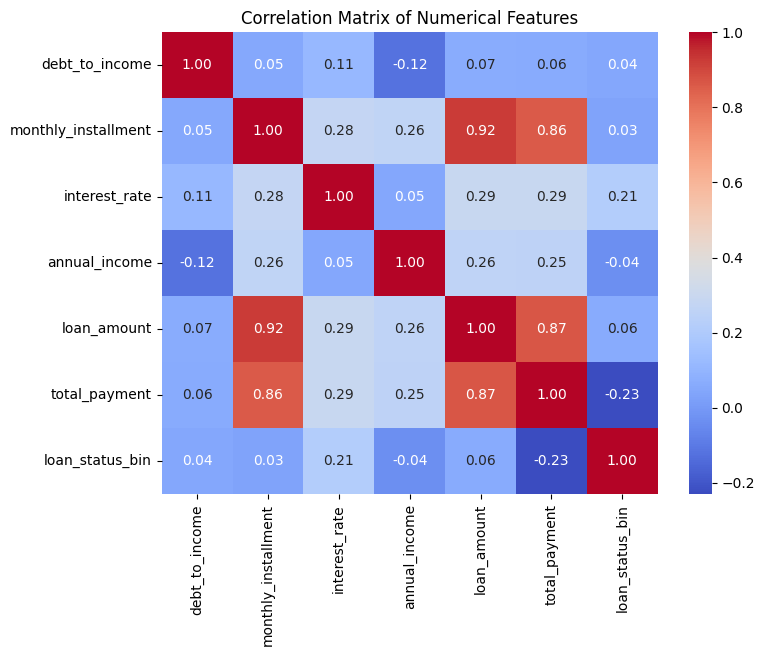

In [57]:
# Compute correlation matrix
corr_matrix = df_new[numerical_features].corr()

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Numerical Feature Insights

- **Strong multicollinearity:** `loan_amount`, `monthly_installment`, and `total_payment` are highly correlated; may need feature reduction for linear models.  
- **Moderate correlations with target:** `interest_rate`, `loan_amount`, and `monthly_installment` show weak-to-moderate correlation with `loan_status_bin`.  
- **Weak predictors:** `annual_income` and `debt_to_income` have minimal linear correlation with loan status but may be useful for tree-based models.  
- **Negative relationships:** Slight negative correlation between `loan_status_bin` and `total_payment`, indicating higher payments may slightly reduce default risk.  
- **Actionable note:** For tree-based models, multicollinearity is less of a concern; for linear models, consider combining or dropping highly correlated features.


## Building Model

In [58]:
num_features = ['debt_to_income', 'monthly_installment', 'interest_rate', 
                'annual_income', 'loan_amount', 'total_payment']
cat_features = ['employment_length', 'home_ownership', 'loan_purpose', 'loan_term', 'verification_status']
target = 'loan_status_bin'


In [73]:
from sklearn.model_selection import train_test_split

X = df_new[['debt_to_income', 'monthly_installment', 'interest_rate','annual_income', 'loan_amount',
            'total_payment','employment_length','home_ownership', 'loan_purpose', 'loan_term', 'verification_status']]
y = df_new['loan_status_bin']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [74]:
X_train_encoded = pd.get_dummies(X_train, columns=cat_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=cat_features, drop_first=True)

# Align test columns with train columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [75]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=(y_train==0).sum() / (y_train==1).sum(),  # handle class imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)
# Sanitize the column names in X_train_encoded
X_train_encoded.columns = [
    c.replace('[', '_').replace(']', '_').replace('<', '_') 
    for c in X_train_encoded.columns
]

# Do the same for the test set to ensure consistency
X_test_encoded.columns = [
    c.replace('[', '_').replace(']', '_').replace('<', '_') 
    for c in X_test_encoded.columns
]

# Now, your fit call will work
xgb_model.fit(X_train_encoded, y_train)

C:\Users\Saif\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [21:14:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

Confusion Matrix:
[[9466  178]
 [ 213 1387]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9644
           1       0.89      0.87      0.88      1600

    accuracy                           0.97     11244
   macro avg       0.93      0.92      0.93     11244
weighted avg       0.96      0.97      0.97     11244



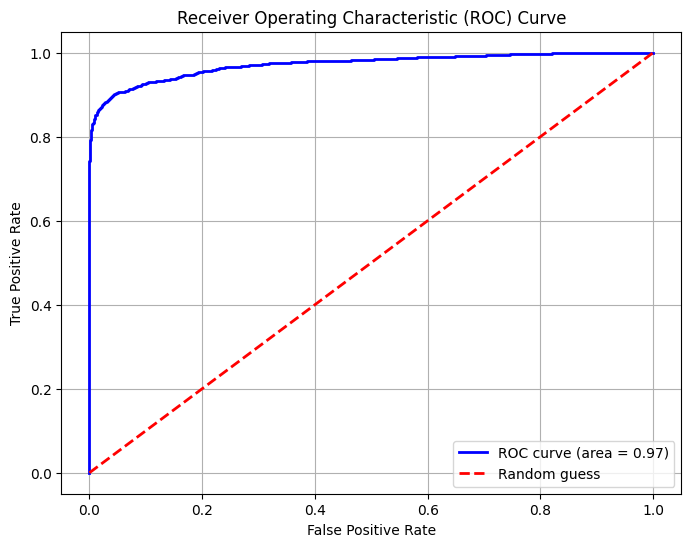

In [76]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get predictions from your trained model
# For the confusion matrix and classification report, you need class predictions.
y_pred = xgb_model.predict(X_test_encoded)

# For the ROC curve, you need probability scores.
y_pred_proba = xgb_model.predict_proba(X_test_encoded)[:, 1]

# 2. Print a Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 3. Print a Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

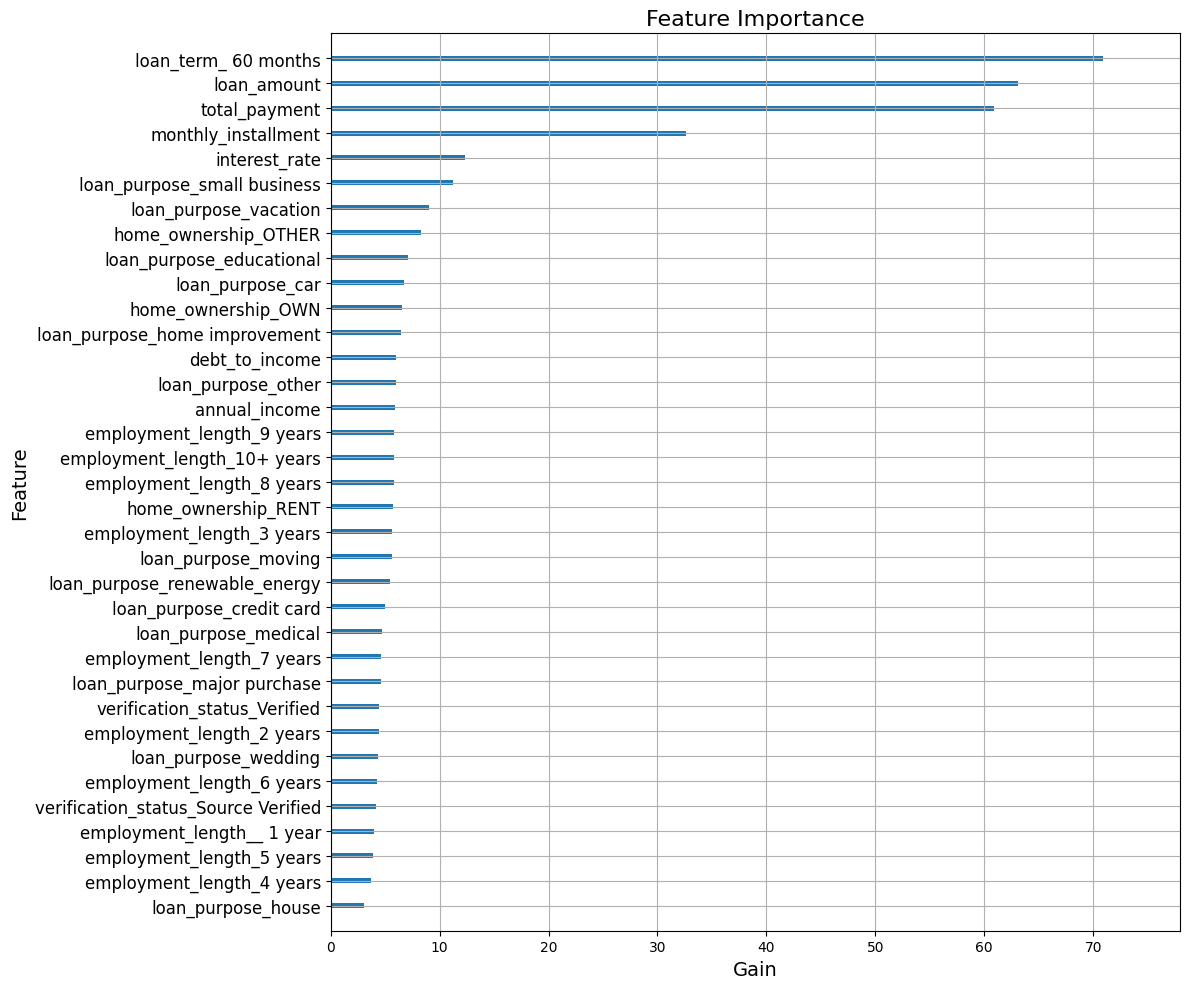

In [79]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Set a larger figure size for better readability
plt.figure(figsize=(12, 10))

# Plot the feature importance using the 'gain' type.
# 'Gain' measures the average improvement to the model from splits on a given feature.
plot_importance(
    xgb_model,
    ax=plt.gca(), # Use the current axes for plotting
    importance_type='gain', # Set the importance metric to 'gain'
    show_values=False # Do not show the numeric value on the bar
)

# Customize the plot
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Gain', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Increase font size of the feature labels on the y-axis
plt.tick_params(axis='y', labelsize=12)

# Ensure the layout is tight to prevent labels from being cut off
plt.tight_layout()

# Save the plot with a higher resolution
plt.savefig('clear_feature_importance.png', dpi=300)

# Display the plot
plt.show()

In [80]:
# Get the feature importances from the trained model
feature_importances = xgb_model.get_booster().get_score(importance_type='gain')

# Convert the dictionary of importances into a pandas DataFrame
importance_df = pd.DataFrame({
    'feature': list(feature_importances.keys()),
    'importance_gain': list(feature_importances.values())
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='importance_gain', ascending=False)

# Display the table
print(importance_df)

                                feature  importance_gain
32                 loan_term_ 60 months        70.879089
4                           loan_amount        63.082150
5                         total_payment        60.900051
1                   monthly_installment        32.609600
2                         interest_rate        12.301046
29          loan_purpose_small business        11.262342
30                loan_purpose_vacation         9.046658
16                 home_ownership_OTHER         8.328753
21             loan_purpose_educational         7.070416
19                     loan_purpose_car         6.703548
17                   home_ownership_OWN         6.592604
22        loan_purpose_home improvement         6.488830
0                        debt_to_income         6.014060
27                   loan_purpose_other         6.002315
3                         annual_income         5.889661
14            employment_length_9 years         5.858399
6           employment_length_1